In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
apps=pd.read_csv('googleplaystore.csv')   

# Data Exploration and Cleaning

In [ ]:
apps.shape

(10841, 13)

In [ ]:
apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# There are 10841 uncleaned samples for analysis with 13 columns. Only the Ratings column is represented as numeric. Other  columns need to be worked on

In [ ]:
apps['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
8 Ball Pool                                           7
Candy Crush Saga                                      7
Zombie Catchers                                       6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
Bowmasters                                            6
Temple Run 2                                          6
Nick                                                  6
Helix Jump                                            6
Subway Surfers                                        6
slither.io                                            6
Bleacher Report: sports news, scores, & highlights    6
Bubble Shooter                                        6
Skyscanner                                            5
MLB At Bat                                      

In [ ]:
apps['Reviews']=pd.to_numeric(apps.Reviews, errors = 'coerce') #convert reviews that is object to the numeric values

In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10840 non-null float64
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [ ]:
apps1=apps.drop_duplicates('App',keep='last').sort_values('Reviews')#drop those apps which have the same name and keep only those apps which have the highest reviews

In [ ]:
apps1['App'].value_counts()  #only unique app is present

SH Script Runner                                      1
Them Bombs: co-op board game play with 2-4 friends    1
Sahadan Live Scores                                   1
Power Rangers: Legacy Wars                            1
EP RSS Reader                                         1
BZ-Digital                                            1
Company Kitchen                                       1
AG Track                                              1
Wheretoget: Shop in style                             1
Map My Fitness Workout Trainer                        1
Google Korean Input                                   1
FK Crvena zvezda                                      1
Facial Wrinkle Reduction                              1
DP and Status Images | All Latest Status 2018         1
Weather –Simple weather forecast                      1
Signal Spy - Monitor Signal Strength & Data Usage     1
Zombie War Z : Hero Survival Rules                    1
Archos File Manager                             

In [ ]:
apps1.shape

(9660, 13)

In [ ]:
apps1['Installs'] = apps1.Installs.str.replace('+', '')    #replace "+" and "," with " "
apps1['Installs'] = apps1.Installs.str.replace(',', '')

In [ ]:
apps1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8872,Eat Right Diet (by Dt Shreya's Family Diet Cli...,HEALTH_AND_FITNESS,NaN,0.0,12M,10,Free,0,Everyone,Health & Fitness,"August 7, 2018",1.0.7,5.0 and up
7440,C J Academy,FAMILY,NaN,0.0,5.2M,10,Free,0,Everyone,Education,"April 2, 2018",1.0,4.4 and up
627,CAM5678 Video Chat,DATING,NaN,0.0,39M,500,Free,0,Mature 17+,Dating,"July 13, 2018",5.5.8,4.0.3 and up
628,Video chat live advices,DATING,NaN,0.0,8.0M,100,Free,0,Everyone,Dating,"July 10, 2018",1.0,3.0 and up
9910,EU RCD Guide,BOOKS_AND_REFERENCE,NaN,0.0,45M,10,Paid,$3.61,Everyone,Books & Reference,"June 29, 2016",2.0,4.0 and up
630,Pet Lovers Dating,DATING,NaN,0.0,14M,10,Free,0,Mature 17+,Dating,"July 9, 2018",1.0,4.1 and up
7445,CJ Infinity,FOOD_AND_DRINK,NaN,0.0,16M,10,Free,0,Everyone,Food & Drink,"January 5, 2018",1.1,4.1 and up
632,Latin Dating,DATING,NaN,0.0,13M,10,Free,0,Mature 17+,Dating,"July 9, 2018",1.0,4.1 and up
7447,CJ IT ApS,BUSINESS,NaN,0.0,18M,10,Free,0,Everyone,Business,"July 2, 2015",1.31.62.109,4.0 and up
7448,CJ Auto école,FAMILY,NaN,0.0,12M,50,Free,0,Everyone,Education,"June 24, 2014",1.0,2.2 and up


In [ ]:
apps1['Installs'] = pd.to_numeric(apps1['Installs'],errors = 'coerce')  #convert object to numeric

In [ ]:
apps1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 8872 to 10472
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            8197 non-null float64
Reviews           9659 non-null float64
Size              9660 non-null object
Installs          9659 non-null float64
Type              9659 non-null object
Price             9660 non-null object
Content Rating    9659 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9652 non-null object
Android Ver       9657 non-null object
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [ ]:
apps1.shape

(9660, 13)

In [ ]:
apps1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
apps1['Price']=apps1.Price.str.replace('$','') #replace '$' with null

In [ ]:
apps1['Price']=pd.to_numeric(apps1.Price, errors = 'coerce')#covert the price that is object to numeric values

In [ ]:
apps1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 8872 to 10472
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            8197 non-null float64
Reviews           9659 non-null float64
Size              9660 non-null object
Installs          9659 non-null float64
Type              9659 non-null object
Price             9659 non-null float64
Content Rating    9659 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9652 non-null object
Android Ver       9657 non-null object
dtypes: float64(4), object(9)
memory usage: 1.0+ MB


In [ ]:
apps1['Size'].value_counts()

Varies with device    1227
11M                    182
12M                    181
14M                    177
13M                    177
15M                    164
26M                    143
17M                    143
16M                    137
19M                    130
10M                    129
21M                    124
20M                    123
18M                    119
25M                    119
24M                    117
22M                    104
23M                    103
27M                     92
29M                     92
28M                     90
30M                     83
3.3M                    73
33M                     71
2.5M                    68
2.3M                    67
37M                     67
31M                     67
2.9M                    67
35M                     65
                      ... 
930k                     1
89k                      1
280k                     1
569k                     1
239k                     1
1,000+                   1
8

In [ ]:
apps1.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              1
Size                 0
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
apps1 = apps1.drop(apps1[apps1.Size.str.contains('Varies with device')].index,axis=0)

In [ ]:
apps1['Size'] = apps1.Size.str.replace('M', 'e6')  #at first replace the string value 'M' with 'e6' and 'k' with 'e3'
apps1['Size'] = apps1.Size.str.replace('k', 'e3')


In [ ]:
apps1['Size']=pd.to_numeric(apps1.Size, errors = 'coerce')#convert the size to numeric values

In [ ]:
apps1['Size'].value_counts()

11000000.0    182
12000000.0    181
13000000.0    177
14000000.0    177
15000000.0    164
26000000.0    143
17000000.0    143
10000000.0    139
16000000.0    137
19000000.0    130
21000000.0    124
20000000.0    123
18000000.0    119
25000000.0    119
24000000.0    117
22000000.0    104
23000000.0    103
29000000.0     92
27000000.0     92
28000000.0     90
30000000.0     83
3300000.0      73
33000000.0     71
2500000.0      68
37000000.0     67
31000000.0     67
2900000.0      67
2300000.0      67
35000000.0     65
2800000.0      65
             ... 
569000.0        1
164000.0        1
695000.0        1
613000.0        1
847000.0        1
421000.0        1
186000.0        1
500000.0        1
716000.0        1
585000.0        1
924000.0        1
91000.0         1
55000.0         1
74000.0         1
629000.0        1
920000.0        1
280000.0        1
67000.0         1
190000.0        1
749000.0        1
253000.0        1
309000.0        1
511000.0        1
809000.0        1
940000.0  

In [ ]:
apps1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8433 entries, 8872 to 10472
Data columns (total 13 columns):
App               8433 non-null object
Category          8433 non-null object
Rating            7028 non-null float64
Reviews           8432 non-null float64
Size              8432 non-null float64
Installs          8432 non-null float64
Type              8433 non-null object
Price             8432 non-null float64
Content Rating    8432 non-null object
Genres            8433 non-null object
Last Updated      8433 non-null object
Current Ver       8425 non-null object
Android Ver       8430 non-null object
dtypes: float64(5), object(8)
memory usage: 922.4+ KB


In [ ]:
apps1['Category'].value_counts()

FAMILY                 1778
GAME                    844
TOOLS                   733
BUSINESS                375
MEDICAL                 369
PERSONALIZATION         351
LIFESTYLE               334
FINANCE                 299
PRODUCTIVITY            291
SPORTS                  287
COMMUNICATION           243
HEALTH_AND_FITNESS      232
PHOTOGRAPHY             222
NEWS_AND_MAGAZINES      201
BOOKS_AND_REFERENCE     194
SOCIAL                  189
TRAVEL_AND_LOCAL        173
SHOPPING                168
DATING                  158
VIDEO_PLAYERS           128
MAPS_AND_NAVIGATION     107
FOOD_AND_DRINK           88
LIBRARIES_AND_DEMO       81
EDUCATION                76
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           61
ART_AND_DESIGN           59
EVENTS                   57
WEATHER                  56
PARENTING                54
ENTERTAINMENT            53
COMICS                   49
BEAUTY                   47
1.9                       1
Name: Category, dtype: int64

In [ ]:
apps1[apps1['Category'] == '1.9'] #drop the category '1.9'

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,NaN,NaN,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
apps1.isnull().sum()

App                  0
Category             0
Rating            1405
Reviews              1
Size                 1
Installs             1
Type                 0
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
apps1 = apps1.dropna(subset=['Rating']) #drop the null values of rating

In [ ]:
apps1.isnull().sum()  #check the null value is present or not

App               0
Category          0
Rating            0
Reviews           1
Size              1
Installs          1
Type              0
Price             1
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [ ]:
apps1['Category'].value_counts() 

FAMILY                 1563
GAME                    803
TOOLS                   628
PERSONALIZATION         276
LIFESTYLE               269
MEDICAL                 267
FINANCE                 258
SPORTS                  223
PRODUCTIVITY            223
BUSINESS                221
PHOTOGRAPHY             204
HEALTH_AND_FITNESS      191
COMMUNICATION           189
SOCIAL                  156
NEWS_AND_MAGAZINES      154
SHOPPING                146
BOOKS_AND_REFERENCE     141
TRAVEL_AND_LOCAL        141
DATING                  121
VIDEO_PLAYERS           113
MAPS_AND_NAVIGATION      94
EDUCATION                75
FOOD_AND_DRINK           72
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       61
ART_AND_DESIGN           57
ENTERTAINMENT            53
WEATHER                  50
HOUSE_AND_HOME           49
COMICS                   47
PARENTING                44
EVENTS                   38
BEAUTY                   37
1.9                       1
Name: Category, dtype: int64

In [ ]:
apps1.shape

(7028, 13)

In [ ]:
apps1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5776,Food-Aw - Order Food Online in Aruba,FOOD_AND_DRINK,5.0,1.0,24000000.0,100.0,Free,0.0,Everyone,Food & Drink,"April 5, 2018",10,4.1 and up
9513,Ek Kahani Aisi Bhi Season 3 - The Horror Story,FAMILY,3.0,1.0,5800000.0,100.0,Free,0.0,Teen,Entertainment,"July 21, 2018",1.1,5.0 and up


In [ ]:
apps1['Rating'].value_counts()

4.4     723
4.3     717
4.5     693
4.2     673
4.6     563
4.1     537
4.0     448
4.7     387
3.9     312
5.0     266
3.8     258
4.8     204
3.7     191
3.6     152
3.5     147
3.4     113
3.3      96
4.9      85
3.0      72
3.1      62
3.2      59
2.9      43
2.8      40
2.6      22
2.7      21
2.3      20
2.4      19
2.5      18
1.0      16
2.2      14
2.0      11
1.9      10
1.8       8
2.1       8
1.7       8
1.6       4
1.5       3
1.4       3
1.2       1
19.0      1
Name: Rating, dtype: int64

In [ ]:
apps1.shape

(7028, 13)

In [ ]:
apps1=apps1[['Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating','Genres']]

In [ ]:
apps1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
5776,FOOD_AND_DRINK,5.0,1.0,24000000.0,100.0,Free,0.0,Everyone,Food & Drink
9513,FAMILY,3.0,1.0,5800000.0,100.0,Free,0.0,Teen,Entertainment
9455,COMMUNICATION,5.0,1.0,25000000.0,10.0,Free,0.0,Teen,Communication
2533,MEDICAL,5.0,1.0,6100000.0,100.0,Free,0.0,Mature 17+,Medical
2482,MEDICAL,4.0,1.0,3300000.0,10.0,Free,0.0,Everyone,Medical


In [ ]:
apps1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7028 entries, 5776 to 10472
Data columns (total 9 columns):
Category          7028 non-null object
Rating            7028 non-null float64
Reviews           7027 non-null float64
Size              7027 non-null float64
Installs          7027 non-null float64
Type              7028 non-null object
Price             7027 non-null float64
Content Rating    7027 non-null object
Genres            7028 non-null object
dtypes: float64(5), object(4)
memory usage: 549.1+ KB


In [ ]:
apps1.isnull().sum() #check null value is present or not

Category          0
Rating            0
Reviews           1
Size              1
Installs          1
Type              0
Price             1
Content Rating    1
Genres            0
dtype: int64

In [ ]:
apps2 = apps1.dropna()  #drop the null values in apps1
apps2.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
5776,FOOD_AND_DRINK,5.0,1.0,24000000.0,100.0,Free,0.0,Everyone,Food & Drink
9513,FAMILY,3.0,1.0,5800000.0,100.0,Free,0.0,Teen,Entertainment


In [ ]:
apps2.describe()

,Rating,Reviews,Size,Installs,Price
count,7027.000000,7.027000e+03,7.027000e+03,7.027000e+03,7027.000000
mean,4.160694,1.449036e+05,2.175764e+07,4.472719e+06,1.170729
std,0.558795,1.023887e+06,2.272703e+07,2.714306e+07,18.196934
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,8.400000e+01,4.900000e+06,1.000000e+04,0.000000
50%,4.300000,1.546000e+03,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.657950e+04,3.100000e+07,1.000000e+06,0.000000
max,5.000000,4.488145e+07,1.000000e+08,1.000000e+09,400.000000


In [ ]:
 le = LabelEncoder()
Category = le.fit_transform(apps2['Category'])
apps2 = apps2.drop('Category',axis = 1)

Gen = pd.factorize(apps2['Genres'])[0]
apps2 = apps2.drop('Genres',axis = 1)

con = pd.factorize(apps2['Content Rating'])[0]
apps2 = apps2.drop('Content Rating',axis = 1)

type2 = pd.factorize(apps2['Type'])[0]
apps2 = apps2.drop('Type',axis = 1)

In [ ]:
apps2['Category']=Category
apps2['Genres']=Gen
apps2['Content Rating']=con
apps2['Type']=type2

In [ ]:
apps2.head(2)

,Rating,Reviews,Size,Installs,Price,Category,Genres,Content Rating,Type
5776,5.0,1.0,24000000.0,100.0,0.0,13,0,0,0
9513,3.0,1.0,5800000.0,100.0,0.0,11,1,1,0


In [ ]:
X = apps2.iloc[:, [1,3,5,6,7]] # Split data into training and testing sets
y = apps2.iloc[:, 0]

In [ ]:
y = np.array(y)                      #multiply rating with the int 10 and covert it to the numeric value 
for i in range(len(y)):
    y[i] = y[i]*10
    y[i] = int(y[i])
y = pd.to_numeric(y , downcast='signed')

y

array([50, 30, 50, ..., 46, 45, 46], dtype=int8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=11)

In [ ]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(5621, 5)
(1406, 5)
(5621,)
(1406,)


# Using Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
from sklearn.preprocessing import StandardScaler   #Using StandardScaler to normalize features before applying machine learning techniques.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_test.shape
y_test.reshape(1406,1)
y_train.reshape(5621,1)

array([[46],
       [38],
       [46],
       ...,
       [45],
       [42],
       [46]], dtype=int8)

In [ ]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None)

In [ ]:
pred2 = gnb.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,pred2) #r2 score on the test data using GaussianNB

0.7694558507782752

# Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [ ]:
clf.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

# r2 score on test data

In [ ]:
r2_score(y_test,pred)  #r2 score on test data using RandomForestClassifier

0.5619496018548531

# Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B78645A550>,
      dtype=object)

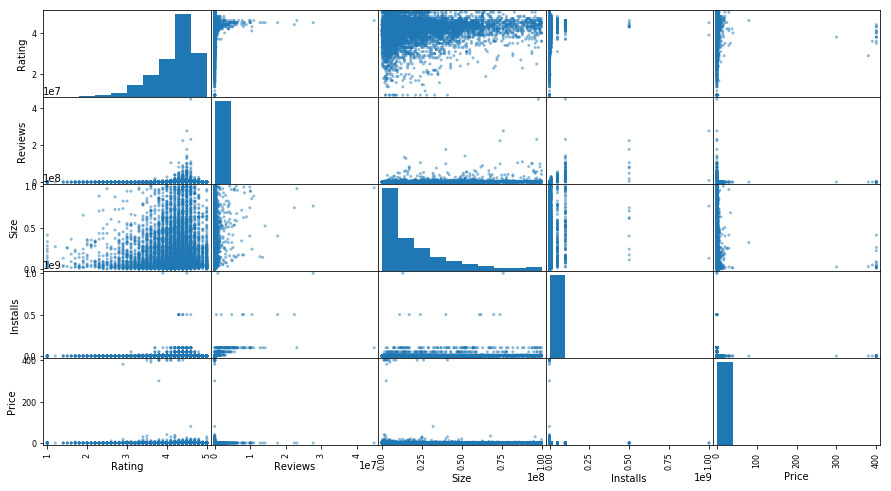

In [ ]:
pd.scatter_matrix(apps2.loc[:,'Rating':'Price'],figsize=(15,8))

Text(0.5,1,'Reviews Vs Rating Graph')

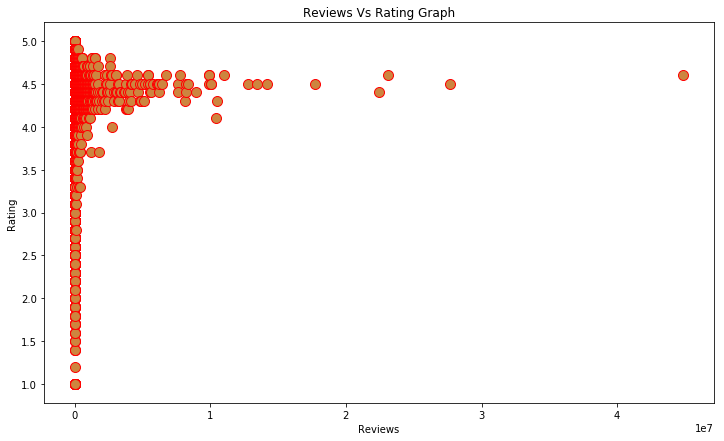

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(apps2['Reviews'],apps2['Rating'],c="peru",s=100,edgecolors="r",linewidths=1)

plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title('Reviews Vs Rating Graph')

Text(0.5,1,'Installs Vs Rating Graph')

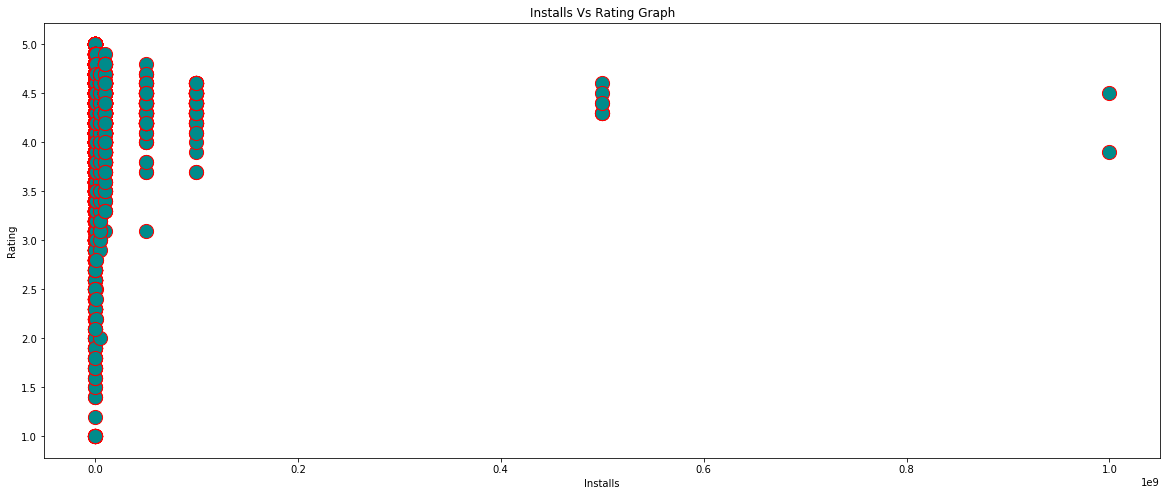

In [ ]:
plt.figure(figsize=(20,8))
plt.scatter(apps2['Installs'],apps2['Rating'],c="darkcyan",s=200,edgecolors="r",linewidths=1)

plt.xlabel('Installs')
plt.ylabel('Rating')
plt.title('Installs Vs Rating Graph')

Text(0.5,1,'Reviews Vs Installs Graph')

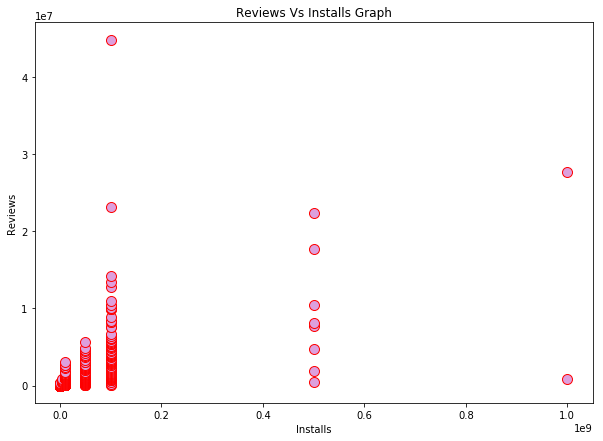

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(apps2['Installs'],apps2['Reviews'],c="plum",s=100,edgecolors="r",linewidths=1)

plt.xlabel('Installs')
plt.ylabel('Reviews')
plt.title('Reviews Vs Installs Graph')

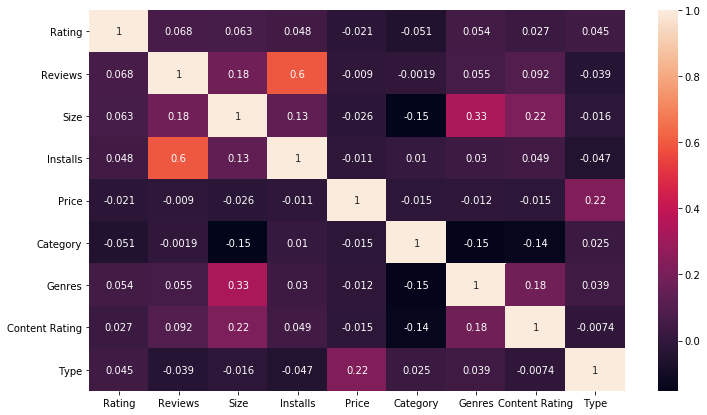

In [ ]:
plt.figure(figsize=(12,7))
temp=apps2.corr()
sns.heatmap(temp,
            xticklabels=temp.columns.values,
            yticklabels=temp.columns.values,
            annot=True) 